# Fashion MNIST (분류)
* 옷과 신발, 가방의 이미지를 모아둔 데이터 셋 
* Fashion-MNIST 데이터셋에는 __10개의 카테고리__ 레이블 설명
    * 0 티셔츠/탑 1 바지 2 풀오버(스웨터의 일종) 3 드레스 4 코트 5 샌들 6 셔츠 7 스니커즈 8 가방 9 앵클 부츠
* 그레이스케일 이미지
* 범주가 10개
* 이미지 크기는 28 X 28

In [1]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt

#### Fashion MNIST 데이터셋 불러오기
* 훈련 데이터 : 60000
* 테스트 데이터 : 10000

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


#### 데이터 확인하기 (그림으로 불러오기)
* imshow() : 이미지를 그래프 형식으로 표현
* colorbar() : 그래프 옆에 색상의 정보를 바 형태로 표시

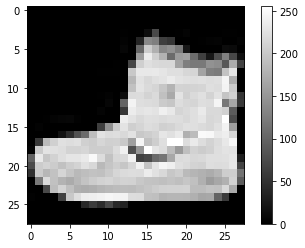

9


In [3]:
plt.imshow(train_X[0], cmap='gray')
plt.colorbar()
plt.show()

# 정답 확인 
print(train_Y[0])

#### 데이터 정규화 
* 기본적으로 데이터가 0~255의 값으로 갖고 있는 상태 --> 0 ~ 1의 값으로 데이터 정규화 

In [4]:
print(train_X[0]) 

train_X = train_X / 255
test_X = test_X / 255
print("-"*50)
print(train_X[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

#### Fashion MNIST 분류 모델
* Flatten 레이어 : 원본이 28 X 28의 2차원 배열이기 때문에 데이터를 일렬로 정렬 --> 다차원 데이터를 1차원으로 정렬하는 역할 
* 2개의 Dense 레이어를 통과하여 예측이 출력 
* 10개중에 1개의 결과가 나오는 경우이기 때문에 마지막 레이어의 units은 10으로 설정

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')    
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


#### Fashion MNIST 분류 모델 컴파일
* sparse_categorical_crossentropy : 기존의 원-핫-인코딩으로 처리해야하는 전처리 없이 희소 행렬을 나타내는 데이터를 정답 행렬로 변환해서 처리한다. 따라서 기존에 정답 데이터에 대해 to_categorical() 함수를 처리하지 않아도 된다. 
* Adam() : lr을 설정하지 않으면 기본 값인 lr=0.001로 설정된다. 

In [6]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### Fashion MNIST 분류 모델 학습

In [7]:
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

Train on 45000 samples, validate on 15000 samples
Epoch 1/25
45000/45000 [==============================] - 3s 75us/sample - loss: 0.5247 - accuracy: 0.8166 - val_loss: 0.4367 - val_accuracy: 0.8456
Epoch 2/25
45000/45000 [==============================] - 3s 64us/sample - loss: 0.3942 - accuracy: 0.8580 - val_loss: 0.4092 - val_accuracy: 0.8467
Epoch 3/25
45000/45000 [==============================] - 3s 65us/sample - loss: 0.3531 - accuracy: 0.8714 - val_loss: 0.3662 - val_accuracy: 0.8676
Epoch 4/25
45000/45000 [==============================] - 3s 67us/sample - loss: 0.3249 - accuracy: 0.8809 - val_loss: 0.3400 - val_accuracy: 0.8767
Epoch 5/25
45000/45000 [==============================] - 3s 64us/sample - loss: 0.3056 - accuracy: 0.8871 - val_loss: 0.3439 - val_accuracy: 0.8741
Epoch 6/25
45000/45000 [==============================] - 3s 63us/sample - loss: 0.2889 - accuracy: 0.8931 - val_loss: 0.3372 - val_accuracy: 0.8771
Epoch 7/25
45000/45000 [==============================] 

#### Fashion MNIST 분류 모델 학습 결과 시각화
* 손실률 그래프
* 정확도 그래프

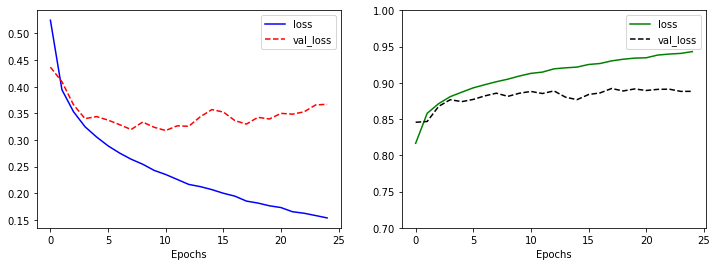

In [8]:
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='loss')
plt.plot(history.history['val_accuracy'], 'k--', label='val_loss')
plt.xlabel('Epochs')
plt.ylim(0.7, 1)     # 범위 지정 
plt.legend()

plt.show()

#### Fashion MNIST 분류 모델 평가

In [9]:
model.evaluate(test_X, test_Y)

10000/10000 [==============================] - 0s 40us/sample - loss: 0.4072 - accuracy: 0.8831


[0.4072220559358597, 0.8831]

#### 정리

* 평가는 정확도 88.4 % --> 괜찮은 수치지만 90% 이상으로 향상 가능 